In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff

!pip install pandas-profiling
!pip install graphviz
!conda install graphviz

%matplotlib inline

  Using cached requests-2.25.1-py2.py3-none-any.whl (61 kB)
  Using cached urllib3-1.26.3-py2.py3-none-any.whl (137 kB)
  Using cached certifi-2020.12.5-py2.py3-none-any.whl (147 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Using cached chardet-4.0.0-py2.py3-none-any.whl (178 kB)
Using legacy 'setup.py install' for htmlmin, since package 'wheel' is not installed.
Using legacy 'setup.py install' for phik, since package 'wheel' is not installed.
    Running setup.py install for phik: started
    Running setup.py install for phik: finished with status 'done'
    Running setup.py install for htmlmin: started
    Running setup.py install for htmlmin: finished with status 'done'


You should consider upgrading via the 'c:\users\spongebob\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\spongebob\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.
'conda' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
data_file="german_credit.arff"
data=arff.loadarff(data_file)


credit_df=pd.DataFrame(data[0])
for col in credit_df.columns:
  if credit_df[col].dtype=='object':
    #making sure data is not read as bytes but as string values from a file
    credit_df[col] = credit_df[col].str.decode('utf-8')
#Look at loaded data and data types
print(credit_df.dtypes)

Creditability                         object
Account Balance                       object
Duration of Credit (month)           float64
Payment Status of Previous Credit     object
Purpose                               object
Credit Amount                        float64
Value Savings/Stocks                  object
Length of current employment          object
Instalment per cent                  float64
Sex & Marital Status                  object
Guarantors                            object
Duration in Current address           object
Most valuable available asset         object
Age (years)                          float64
Concurrent Credits                    object
Type of apartment                     object
No of Credits at this Bank           float64
Occupation                            object
No of dependents                     float64
Telephone                             object
Foreign Worker                        object
dtype: object


In [3]:
np.transpose(credit_df.head(10))

,0,1,2,3,4,5,6,7,8,9
Creditability,1,1,1,1,1,1,1,1,1,1
Account Balance,1,1,2,1,1,1,1,1,4,2
Duration of Credit (month),18.0,9.0,12.0,12.0,12.0,10.0,8.0,6.0,18.0,24.0
Payment Status of Previous Credit,4,4,2,4,4,4,4,4,4,2
Purpose,2,0,9,0,0,0,0,0,3,3
Credit Amount,1049.0,2799.0,841.0,2122.0,2171.0,2241.0,3398.0,1361.0,1098.0,3758.0
Value Savings/Stocks,1,1,2,1,1,1,1,1,1,3
Length of current employment,2,3,4,3,3,2,4,2,1,1
Instalment per cent,4.0,2.0,2.0,3.0,4.0,1.0,1.0,2.0,4.0,1.0
Sex & Marital Status,2,3,2,3,3,3,3,3,2,2


In [4]:
#Remove Outliers

credit_q3 = credit_df.quantile(.75)
credit_q1 = credit_df.quantile(.25)
credit_iqr = credit_q3 - credit_q1
#print(credit_q3)
#print(credit_df < (credit_q1 - 1.5 * credit_iqr)) |(credit_df > (credit_q3 + 1.5 * credit_iqr))

credit_df_out = credit_df[~((credit_df < (credit_q1 - 1.5 * credit_iqr)) |(credit_df > (credit_q3 + 1.5 * credit_iqr))).any(axis=1)]
np.transpose(credit_df_out.head(20))

<ipython-input-4-6e4c413b2938>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  credit_df_out = credit_df[~((credit_df < (credit_q1 - 1.5 * credit_iqr)) |(credit_df > (credit_q3 + 1.5 * credit_iqr))).any(axis=1)]
<ipython-input-4-6e4c413b2938>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  credit_df_out = credit_df[~((credit_df < (credit_q1 - 1.5 * credit_iqr)) |(credit_df > (credit_q3 + 1.5 * credit_iqr))).any(axis=1)]


,0,2,4,6,9,11,12,14,17,18,19,22,23,25,26,27,28,29,30,31
Creditability,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
Account Balance,1,2,1,1,2,1,1,1,2,2,4,2,2,2,1,2,4,3,3,4
Duration of Credit (month),18.0,12.0,12.0,8.0,24.0,30.0,6.0,18.0,18.0,36.0,11.0,36.0,12.0,11.0,12.0,9.0,15.0,42.0,30.0,36.0
Payment Status of Previous Credit,4,2,4,4,2,4,4,2,2,4,4,2,4,3,2,4,2,4,4,4
Purpose,2,9,0,0,3,1,3,3,3,3,0,5,4,3,2,3,0,1,3,0
Credit Amount,1049.0,841.0,2171.0,3398.0,3758.0,6187.0,1957.0,1936.0,3213.0,2337.0,7228.0,2384.0,1424.0,4771.0,652.0,1154.0,3556.0,4796.0,3017.0,3535.0
Value Savings/Stocks,1,2,1,1,3,2,1,5,3,1,1,1,1,1,1,1,5,1,1,1
Length of current employment,2,4,3,4,1,4,4,4,2,5,3,2,4,4,5,5,3,5,5,4
Instalment per cent,4.0,2.0,4.0,1.0,1.0,1.0,1.0,2.0,1.0,4.0,1.0,4.0,4.0,2.0,4.0,2.0,3.0,4.0,4.0,4.0
Sex & Marital Status,2,2,3,3,2,4,2,4,4,3,3,3,3,3,2,3,3,3,3,3


In [5]:
credit_df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Creditability                      728 non-null    object 
 1   Account Balance                    728 non-null    object 
 2   Duration of Credit (month)         728 non-null    float64
 3   Payment Status of Previous Credit  728 non-null    object 
 4   Purpose                            728 non-null    object 
 5   Credit Amount                      728 non-null    float64
 6   Value Savings/Stocks               728 non-null    object 
 7   Length of current employment       728 non-null    object 
 8   Instalment per cent                728 non-null    float64
 9   Sex & Marital Status               728 non-null    object 
 10  Guarantors                         728 non-null    object 
 11  Duration in Current address        728 non-null    object 

In [6]:
credit_df_out.isnull().sum()

Creditability                        0
Account Balance                      0
Duration of Credit (month)           0
Payment Status of Previous Credit    0
Purpose                              0
Credit Amount                        0
Value Savings/Stocks                 0
Length of current employment         0
Instalment per cent                  0
Sex & Marital Status                 0
Guarantors                           0
Duration in Current address          0
Most valuable available asset        0
Age (years)                          0
Concurrent Credits                   0
Type of apartment                    0
No of Credits at this Bank           0
Occupation                           0
No of dependents                     0
Telephone                            0
Foreign Worker                       0
dtype: int64

In [7]:
np.transpose(credit_df_out.describe())

,count,mean,std,min,25%,50%,75%,max
Duration of Credit (month),728.0,18.383242,8.603291,6.0,12.0,18.0,24.00,42.0
Credit Amount,728.0,2504.931319,1639.233248,250.0,1295.0,2045.0,3251.75,7865.0
Instalment per cent,728.0,3.059066,1.092969,1.0,2.0,4.0,4.00,4.0
Age (years),728.0,34.005495,10.480609,19.0,26.0,31.0,39.00,64.0
No of Credits at this Bank,728.0,1.365385,0.522937,1.0,1.0,1.0,2.00,3.0
No of dependents,728.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0


c:\users\spongebob\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\spongebob\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='No of dependents', ylabel='Density'>

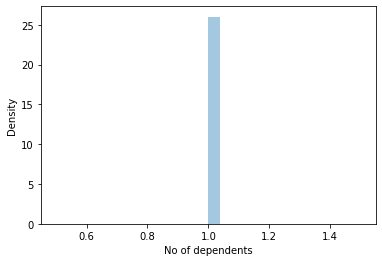

In [8]:
sns.distplot(credit_df_out['No of dependents'])

c:\users\spongebob\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit Amount', ylabel='Density'>

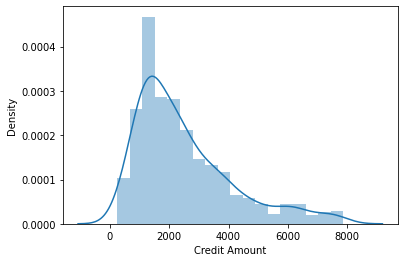

In [9]:
sns.distplot(credit_df_out['Credit Amount'])

c:\users\spongebob\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='No of Credits at this Bank', ylabel='Density'>

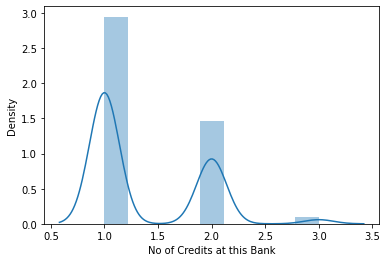

In [10]:
sns.distplot(credit_df_out['No of Credits at this Bank'])

c:\users\spongebob\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age (years)', ylabel='Density'>

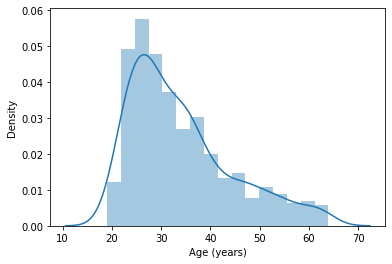

In [11]:
sns.distplot(credit_df_out['Age (years)'])

c:\users\spongebob\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Duration of Credit (month)'>

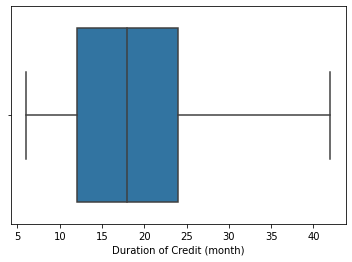

In [12]:
sns.boxplot(credit_df_out['Duration of Credit (month)'])

c:\users\spongebob\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit Amount'>

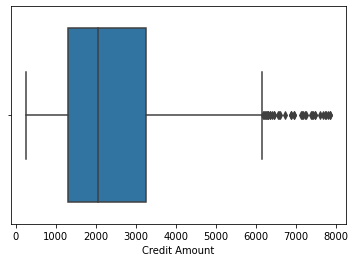

In [13]:
sns.boxplot(credit_df_out['Credit Amount'])

c:\users\spongebob\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='No of Credits at this Bank'>

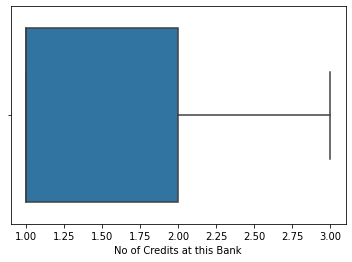

In [14]:
sns.boxplot(credit_df_out['No of Credits at this Bank'])

c:\users\spongebob\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age (years)'>

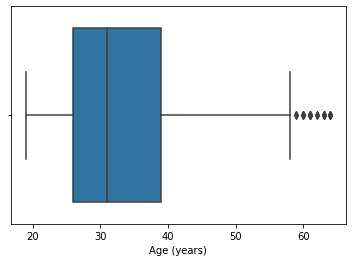

In [15]:
sns.boxplot(credit_df_out['Age (years)'])

In [16]:
from sklearn.model_selection import train_test_split

class_col_name='Creditability' 
feature_names=credit_df_out.columns[credit_df_out.columns != class_col_name ]

X_train, X_test, y_train, y_test = train_test_split(credit_df_out.loc[:, feature_names], credit_df_out[class_col_name], test_size=0.3,random_state=1) 

In [17]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
print("Successfuly trained the decision tree...")

Successfuly trained the decision tree...


In [48]:
import graphviz

#Get unique class values to display on the tree
class_values=credit_df_out[class_col_name].unique()
print ("class Names",feature_names)


dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names,  
                                class_names=class_values,
                                filled=True)
# Plot tree
graph = graphviz.Source(dot_data, format="png") 
graph

class Names Index(['Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'],
      dtype='object')


ValueError: Length of feature_names, 20 does not match number of features, 64

In [19]:
y_pred = clf.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[ 14  42]
 [ 12 151]]
TP:  151 , FP:  42 , TN:  14 , FN: 12


In [21]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.25      0.34        56
           1       0.78      0.93      0.85       163

    accuracy                           0.75       219
   macro avg       0.66      0.59      0.59       219
weighted avg       0.72      0.75      0.72       219



In [22]:
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)

In [23]:
print ("Total Columns (including class)",len(credit_df_out.columns))

Total Columns (including class) 21


In [24]:
print("Number of features used ",nb.n_features_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  20
Classes  ['0' '1']
Number of records for classes  [134. 375.]
Log prior probability for classes  [-1.33460822 -0.30552199]
Log conditional probability for each feature given a class
 [[-7.27020625 -4.89043613 -7.09327554 -6.95468938 -0.03314723 -7.35428937
  -6.78469844 -6.71289727 -6.97850003 -7.75975448 -6.88373764 -7.04384209
  -4.43865463 -6.89753097 -7.27830346 -7.613151   -6.8252103  -7.87836022
  -7.58513797 -7.86365407]
 [-6.8051358  -4.99029897 -6.89942609 -6.82955016 -0.03534899 -7.07747544
  -6.61480681 -6.75714107 -6.87924377 -7.72421334 -6.81445553 -7.05698045
  -4.32767797 -6.84680849 -7.22414302 -7.54967392 -6.79406557 -7.85840941
  -7.54383165 -7.82185181]]


In [25]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.36      0.32        56
           1       0.76      0.69      0.72       163

    accuracy                           0.61       219
   macro avg       0.52      0.53      0.52       219
weighted avg       0.64      0.61      0.62       219



In [26]:
cat_cols=["Account Balance","Payment Status of Previous Credit","Purpose","Value Savings/Stocks","Length of current employment","Sex & Marital Status"\
          ,"Guarantors","Duration in Current address","Most valuable available asset","Concurrent Credits","Type of apartment","Occupation", \
          "Telephone","Foreign Worker"]

In [27]:
# Create a copy of the data frame in memory with a different name
df_onehot=credit_df_out.copy()
#convert only categorical variables/features to dummy/one-hot features
df_onehot = pd.get_dummies(credit_df_out, columns=cat_cols, prefix = cat_cols)
#print the dataset
np.transpose(df_onehot.head())

,0,2,4,6,9
Creditability,1,1,1,1,1
Duration of Credit (month),18.0,12.0,12.0,8.0,24.0
Credit Amount,1049.0,841.0,2171.0,3398.0,3758.0
Instalment per cent,4.0,2.0,4.0,1.0,1.0
Age (years),21.0,23.0,38.0,39.0,23.0
...,...,...,...,...,...
Occupation_4,0,0,0,0,0
Telephone_1,1,1,1,1,1
Telephone_2,0,0,0,0,0
Foreign Worker_1,1,1,0,0,1


In [28]:
#NAIVE BAYES WITH ONE HOT

#Repeat the train test set split
from sklearn.model_selection import train_test_split
class_col_name="Creditability"
# Uncomment following line for class name for bank dataset
# class_col_name="y"
# Uncomment following line for class name for Churn dataset
#class_col_name="Churn"
one_hot_feature_names=df_onehot.columns[df_onehot.columns != class_col_name]
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df_onehot.loc[:, one_hot_feature_names], df_onehot[class_col_name], test_size=0.3,random_state=109) # 70% training and 30% test

In [29]:
# Repeat Naive Bayes modeling
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)
print ("Succesfully done..")

Succesfully done..


In [30]:
print("Number of features used ",nb.n_features_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  64
Classes  ['0' '1']
Number of records for classes  [131. 378.]
Log prior probability for classes  [-1.35725069 -0.29755382]
Log conditional probability for each feature given a class
 [[ -4.83163085  -0.02861536  -6.66655149  -4.3898248   -7.54718577
   -7.84053358  -8.61246164  -8.93914587 -10.52611093  -9.67881307
  -10.42075041 -10.52611093  -8.3044949  -10.23842886  -9.63229305
   -8.93914587 -12.72333551 -12.72333551  -9.35603968  -9.16798744
  -11.62472322 -10.93157604 -10.52611093 -12.03018833 -10.32544023
   -8.14862453  -9.95074678 -10.93157604 -11.62472322 -10.08427818
  -10.42075041  -9.08574935  -8.75304359  -9.83296375  -9.89012216
  -10.32544023  -8.69798382  -8.8113125   -9.83296375  -7.95265088
  -10.32544023 -11.11389759  -9.72760323  -8.85213449  -9.50445968
   -8.98566589  -9.13981657  -9.11241759  -8.91667302  -9.89012216
   -9.77889653 -10.42075041  -8.06937516  -9.11241759  -8.23469914
  -10.64389396 -11.11389759  -9.42749864  -8.3044949

In [31]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[ 31  28]
 [ 27 133]]
TP:  133 , FP:  28 , TN:  31 , FN: 27


In [32]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.53      0.53        59
           1       0.83      0.83      0.83       160

    accuracy                           0.75       219
   macro avg       0.68      0.68      0.68       219
weighted avg       0.75      0.75      0.75       219



class Names ['1' '0']


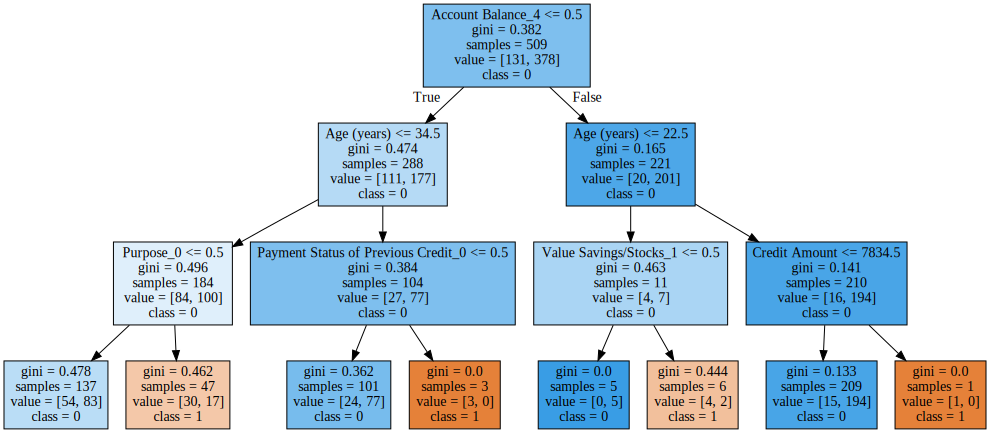

In [33]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)
import graphviz
#Get unique class values to display on the tree
class_values=df_onehot[class_col_name].unique()
print ("class Names",class_values)

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=one_hot_feature_names,  
                                class_names=class_values,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [34]:
# Perform prediction on the test set
y_pred = clf.predict(X_test)

In [35]:
# Get classification report
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.20      0.31        59
           1       0.77      0.96      0.85       160

    accuracy                           0.75       219
   macro avg       0.70      0.58      0.58       219
weighted avg       0.73      0.75      0.70       219



In [36]:
from pandas_profiling import ProfileReport
profile = ProfileReport(credit_df_out)

In [37]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/35 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

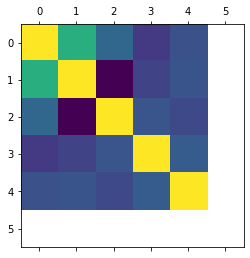

In [38]:
plt.matshow(credit_df_out.corr())
plt.show()

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

decision_tree = DecisionTreeClassifier(random_state=0, max_depth=5)
decision_tree = decision_tree.fit(X_train, y_train)
r = export_text(decision_tree)
print(r)

|--- feature_9 <= 0.50
|   |--- feature_3 <= 34.50
|   |   |--- feature_15 <= 0.50
|   |   |   |--- feature_0 <= 37.50
|   |   |   |   |--- feature_41 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_41 >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  37.50
|   |   |   |   |--- class: 0
|   |   |--- feature_15 >  0.50
|   |   |   |--- feature_1 <= 5550.00
|   |   |   |   |--- feature_34 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_34 >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  5550.00
|   |   |   |   |--- class: 1
|   |--- feature_3 >  34.50
|   |   |--- feature_10 <= 0.50
|   |   |   |--- feature_0 <= 11.50
|   |   |   |   |--- feature_13 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_13 >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  11.50
|   |   |   |   |--- feature_1 <= 1227.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feat

In [40]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = credit_df_out.corr()
corr.style.background_gradient(cmap='coolwarm')

c:\users\spongebob\appdata\local\programs\python\python38\lib\site-packages\pandas\io\formats\style.py:1264: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
c:\users\spongebob\appdata\local\programs\python\python38\lib\site-packages\pandas\io\formats\style.py:1265: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,Duration of Credit (month),Credit Amount,Instalment per cent,Age (years),No of Credits at this Bank,No of dependents
Duration of Credit (month),1.000000,0.537822,0.162011,-0.039961,0.055051,nan
Credit Amount,0.537822,1.000000,-0.254025,0.002301,0.073791,nan
Instalment per cent,0.162011,-0.254025,1.000000,0.078864,0.022354,nan
Age (years),-0.039961,0.002301,0.078864,1.000000,0.111317,nan
No of Credits at this Bank,0.055051,0.073791,0.022354,0.111317,1.000000,nan
No of dependents,nan,nan,nan,nan,nan,nan


In [41]:
print ("class Names",feature_names)

class Names Index(['Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'],
      dtype='object')


In [42]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))# List to store the average RMSE for each value of max_depth:
accuracy = [] 
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(X_train, y_train)    
    score = clf.score(X_test, y_test)
    accuracy.append(score)
print(accuracy)

[0.730593607305936, 0.730593607305936, 0.7534246575342466, 0.7488584474885844, 0.726027397260274]


In [43]:
y_test

508    1
70     1
465    1
280    1
435    1
      ..
216    1
839    0
308    1
75     1
248    1
Name: Creditability, Length: 219, dtype: object

In [44]:
X_train, X_test, y_train, y_test = train_test_split(credit_df_out.loc[:, feature_names], credit_df_out[class_col_name], test_size=0.3,random_state=1) 

In [45]:
credit_df_out.loc[:, feature_names]

,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,18.0,4,2,1049.0,1,2,4.0,2,1,4,2,21.0,3,1,1.0,3,1.0,1,1
2,2,12.0,2,9,841.0,2,4,2.0,2,1,4,1,23.0,3,1,1.0,2,1.0,1,1
4,1,12.0,4,0,2171.0,1,3,4.0,3,1,4,2,38.0,1,2,2.0,2,1.0,1,2
6,1,8.0,4,0,3398.0,1,4,1.0,3,1,4,1,39.0,3,2,2.0,2,1.0,1,2
9,2,24.0,2,3,3758.0,3,1,1.0,2,1,4,4,23.0,3,1,1.0,1,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,1,18.0,4,0,3966.0,1,5,1.0,2,1,4,1,33.0,1,1,3.0,3,1.0,2,1
994,1,12.0,0,3,6199.0,1,3,4.0,3,1,2,2,28.0,3,1,2.0,3,1.0,2,1
996,1,24.0,2,0,2303.0,1,5,4.0,3,2,1,1,45.0,3,2,1.0,3,1.0,1,1
998,2,12.0,2,3,6468.0,5,1,2.0,3,1,1,4,52.0,3,2,1.0,4,1.0,2,1


In [46]:
nb.feature_count_

array([[2.67400e+03, 3.26021e+05, 4.26000e+02, 4.16000e+03, 1.76000e+02,
        1.31000e+02, 6.00000e+01, 4.30000e+01, 8.00000e+00, 2.00000e+01,
        9.00000e+00, 8.00000e+00, 8.20000e+01, 1.10000e+01, 2.10000e+01,
        4.30000e+01, 0.00000e+00, 0.00000e+00, 2.80000e+01, 3.40000e+01,
        2.00000e+00, 5.00000e+00, 8.00000e+00, 1.00000e+00, 1.00000e+01,
        9.60000e+01, 1.50000e+01, 5.00000e+00, 2.00000e+00, 1.30000e+01,
        9.00000e+00, 3.70000e+01, 5.20000e+01, 1.70000e+01, 1.60000e+01,
        1.00000e+01, 5.50000e+01, 4.90000e+01, 1.70000e+01, 1.17000e+02,
        1.00000e+01, 4.00000e+00, 1.90000e+01, 4.70000e+01, 2.40000e+01,
        4.10000e+01, 3.50000e+01, 3.60000e+01, 4.40000e+01, 1.60000e+01,
        1.80000e+01, 9.00000e+00, 1.04000e+02, 3.60000e+01, 8.80000e+01,
        7.00000e+00, 4.00000e+00, 2.60000e+01, 8.20000e+01, 1.90000e+01,
        8.30000e+01, 4.80000e+01, 1.30000e+02, 1.00000e+00],
       [6.72800e+03, 9.48685e+05, 1.14000e+03, 1.33530e+04, 5.1

In [47]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[  5  51]
 [ 14 149]]
TP:  149 , FP:  51 , TN:  5 , FN: 14
